<h3> AIML LAB IA PRACTICE</h3>

### K Means Clustering Scratch

Centroids: [[2.  5. ]
 [4.5 6.5]
 [6.5 2.5]]
Cluster 1: 2 points, [array([2, 4]), array([2, 6])]
Cluster 2: 2 points, [array([5, 6]), array([4, 7])]
Cluster 3: 2 points, [array([8, 3]), array([5, 2])]


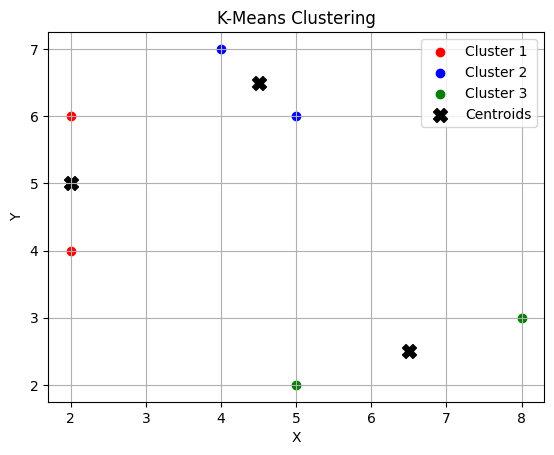

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def k_means(X, k, max_iters=100):
    centroids = np.array([[2, 4],[5,6], [8, 3]])  # Manually set initial centroids
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            clusters[np.argmin(distances)].append(point)

        new_centroids = [np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)]
        if np.allclose(centroids, new_centroids): break
        centroids = np.array(new_centroids)
    
    return centroids, clusters

# Running K-Means
X = np.array([[2,4], [2, 6], [5,6], [4,7], [8, 3], [5,2]])
k = 3
centroids, clusters = k_means(X, k)

# Final Results
print("Centroids:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {len(cluster)} points, {cluster}")
    
colors = ['red', 'blue', 'green']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(*cluster.T, c=colors[i], label=f'Cluster {i+1}')
    
plt.scatter(*centroids.T, c='black', marker='X', s=100, label='Centroids')
plt.legend()
plt.grid(True)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Centroids: [[2.5 2.5]
 [7.5 7.5]]
Labels: [0 0 1 1 0 1 0 1]


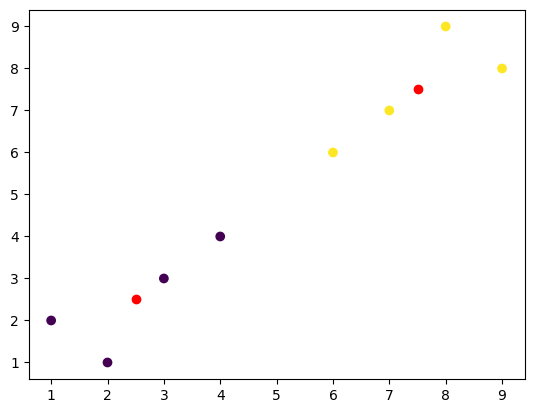

In [28]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Data
X = np.array([[1, 2], [2, 1], [8, 9], [9, 8], [3, 3], [7, 7], [4, 4], [6, 6]])

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Final results
print("Centroids:", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)
plt.scatter(*X.T, c=kmeans.labels_)
plt.scatter(*kmeans.cluster_centers_.T, c='r')
plt.show()


Slope: 9449.962321455076
Intercept: 25792.200198668696
R^2: 0.9569566641435086
Best Fit: y = 9449.96x + 25792.20


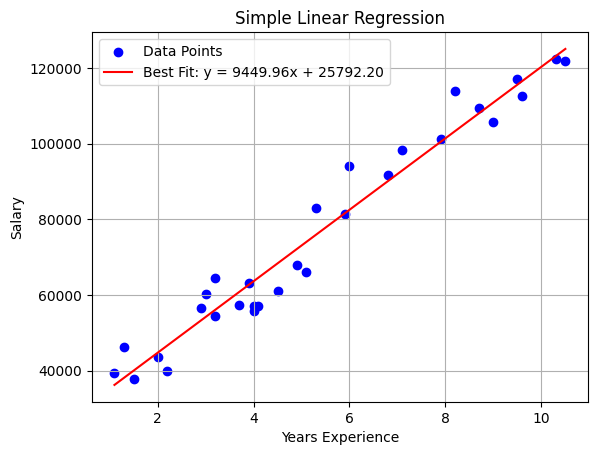

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Datasets/logistic_Salary_Data.csv")
x = data["YearsExperience"]
y = data["Salary"]
n = len(x)

xMean = sum(x) / n
yMean = sum(y) / n

dx = x - xMean
dy = y - yMean

d = dx * dy
dx2 = dx * dx
dy2 = dy * dy

m = sum(d) / sum(dx2)
c = yMean - m * xMean

yp = m * x + c

r2 = 1 - (sum((y - yp) ** 2) / sum(dy2))

plt.scatter(x, y, c='b')
plt.plot(x, yp, c='r')

print(f'Slope: {m}')
print(f'Intercept: {c}')
print(f'R^2: {r2}')
print(f'Best Fit: y = {m:.2f}x + {c:.2f}')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend(['Data Points', f'Best Fit: y = {m:.2f}x + {c:.2f}'])
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()

Slope: 9449.962321455074
Intercept: 25792.20019866871


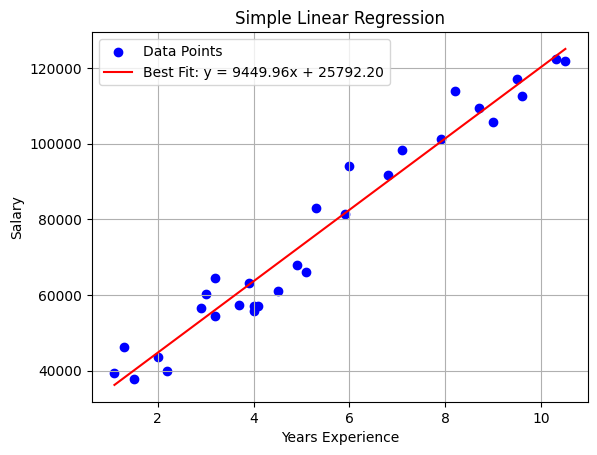

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("Datasets/logistic_Salary_Data.csv")
x = data[["YearsExperience"]]
y = data["Salary"]

model = LinearRegression()
model.fit(x, y)

yp = model.predict(x)

slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(x, y, c='b')
plt.plot(x, yp, c='r')
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend(['Data Points', f'Best Fit: y = {slope:.2f}x + {intercept:.2f}'])
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()

#### MULTI LR

Petrol_tax: -34.79
Average_income: -0.07
Paved_Highways: -0.00
Population_Driver_licence(%): 1336.45
Intercept: 377.29


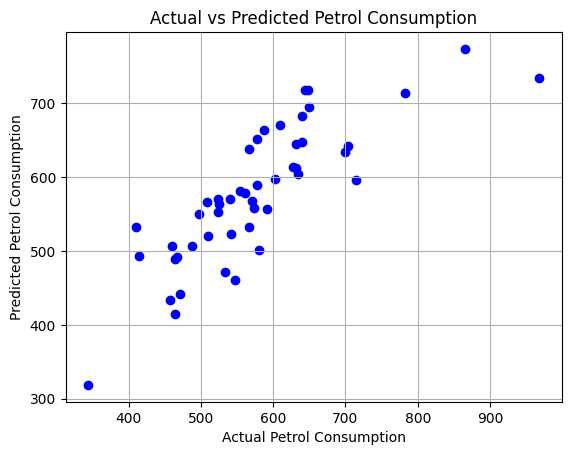

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Datasets/petrol_consumption.csv")

x = data[["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]]
y = data["Petrol_Consumption"]

X = np.c_[np.ones(x.shape[0]), x]

beta = np.linalg.inv(X.T @ X) @ X.T @ y

intercept = beta[0]
slope = beta[1:]

for name, coef in zip(x.columns, slope):
    print(f"{name}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

yp = X @ beta

plt.scatter(y, yp, c='blue')
plt.xlabel("Actual Petrol Consumption")
plt.ylabel("Predicted Petrol Consumption")
plt.title("Actual vs Predicted Petrol Consumption")
plt.grid(True)
plt.show()


#### KNN

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("Datasets/iris.csv")
df = df.drop(columns=['Id'])

k = 5
test = np.array([6.1, 3.0, 2.4, 1])

data = df.iloc[:, :-1]
distance = np.sqrt(((data - test) ** 2).sum(axis=1))
df["Distance"] = distance

k_nearest = df.nsmallest(k, "Distance")["Species"]
print("Predicted Class:", k_nearest.mode()[0])

Predicted Class: Iris-versicolor


In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Datasets/iris.csv")
df = df.drop(columns=['Id'])

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

test = np.array([[6.1, 3.0, 2.4, 1]])

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)

predicted_class = knn.predict(test)
print("Predicted Class:", label_encoder.inverse_transform(predicted_class)[0])

Predicted Class: Iris-versicolor


#### Decision Tree

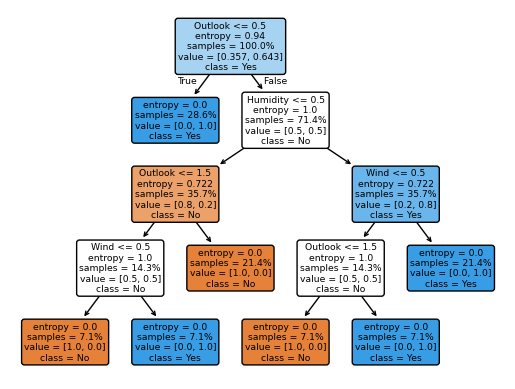

In [12]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("Datasets/tennis.csv")
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])
x = df.iloc[:,:-1]
y = df["Play"]
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(x, y)
plt = plot_tree(clf, feature_names=df.columns, class_names=["No", "Yes"], proportion=True,rounded=True, filled=True)

In [2]:
import math
import pandas as pd
import pprint

def entropy(col):
    e = 0
    total = len(col)
    count = col.value_counts()
    for decision in col.unique():
        e -= count[decision] / total * math.log2(count[decision] / total)
    return e

def gain(df, col, target):
    g = entropy(df[target])
    for value in df[col].unique():
        table = df[df[col] == value]
        g -= len(table) / len(df[col]) * entropy(table[target])
    return g

def id3(df, target, features):
    if len(df[target].unique()) == 1:
        return df[target].iloc[0]
    
    best = max(features, key=lambda col: gain(df, col, target))
    tree = {best: {}}
    
    for value in df[best].unique():
        subset = df[df[best] == value]
        tree[best][value] = id3(subset, target, [f for f in features if f != best])
    
    return tree

df = pd.read_csv("Datasets/tennis.csv")
tree = id3(df, "Play", df.columns[:-1])
pprint.pp(tree)


{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}},
             'Overcast': 'Yes',
             'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


#### NAIVE BAYERS 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temp": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)

le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop(columns=["Play"])
y = df["Play"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes classifier: {accuracy * 100:.2f}%")

Accuracy of Naive Bayes classifier: 60.00%


In [6]:
def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 5)

def check_winner(board, player):
    for row in board:
        if all(s == player for s in row):
            return True
    for col in range(3):
        if all(board[row][col] == player for row in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

board = [[" " for _ in range(3)] for _ in range(3)]
players = ["X", "O"]
turn = 0

for _ in range(9):
    print_board(board)
    row, col = map(int, input(f"Player {players[turn]}, enter row and column (0-2): ").split())
    
    if board[row][col] == " ":
        board[row][col] = players[turn]
        if check_winner(board, players[turn]):
            print_board(board)
            print(f"Player {players[turn]} wins!")
            break
        turn = 1 - turn
    else:
        print("Invalid move, try again.")
else:
    print("It's a draw!")

  |   |  
-----
  |   |  
-----
  |   |  
-----


Player X, enter row and column (0-2):  0 0


X |   |  
-----
  |   |  
-----
  |   |  
-----


Player O, enter row and column (0-2):  0 1


X | O |  
-----
  |   |  
-----
  |   |  
-----


Player X, enter row and column (0-2):  1 1


X | O |  
-----
  | X |  
-----
  |   |  
-----


Player O, enter row and column (0-2):  2 0


X | O |  
-----
  | X |  
-----
O |   |  
-----


Player X, enter row and column (0-2):  2 2


X | O |  
-----
  | X |  
-----
O |   | X
-----
Player X wins!
